# Audio

## Task 1

Для начала познакомимся с этими записями. \
Установи библиотеку [librosa](https://librosa.org/). Это популярная библиотека для работы с аудио.
Визуализируй аудио сигнал файла `0_1_0_1_1_1_0_0.wav` с помощью функции [librosa.display.waveshow](https://librosa.org/doc/main/generated/librosa.display.waveshow.html)
График должен быть такой же, как показано ниже (по значениям):

![waveform](../misc/images/waveform.png)
>Для того, чтобы прослушать это аудио файл, можешь воспользоваться [IPython.display.Audio](http://ipython.org/ipython-doc/stable/api/generated/IPython.display.html#IPython.display.Audio)

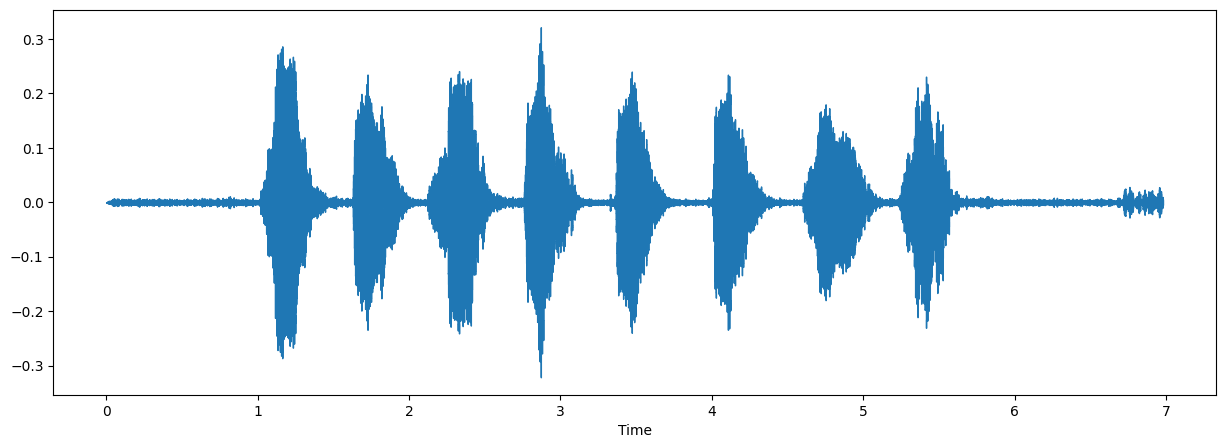

In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


%matplotlib inline

# загрузка аудиофайла
filename = '../datasets/waves_yesno 2/0_1_0_1_1_1_0_0.wav'
audio_data, sample_rate = librosa.load(filename)

# создание интерактивной кнопки для воспроизведения аудиофайла
ipd.Audio(audio_data, rate=sample_rate)

# вывод визуализации аудиофайла
plt.figure(figsize=(15,5))
librosa.display.waveshow(audio_data, sr=sample_rate)
plt.xlabel('Time')
plt.show()
audio_file = '../datasets/waves_yesno 2/0_1_0_1_1_1_0_0.wav'
ipd.Audio(audio_file)

## Task 2

Для классификации обычно использует не просто аудио сигнал, а его частотно-временное представление. Для этого сигнал требуется
преобразовать с помощью [оконного преобразования Фурье](https://clck.ru/34JnZD).
С помощью функции [librosa.display.specshow](https://librosa.org/doc/main/generated/librosa.display.specshow.html) 
выведи спектрограмму сигнала. \
График должен быть такой же, как показано ниже (по значениям):
![sftp](../misc/images/sftp.png)

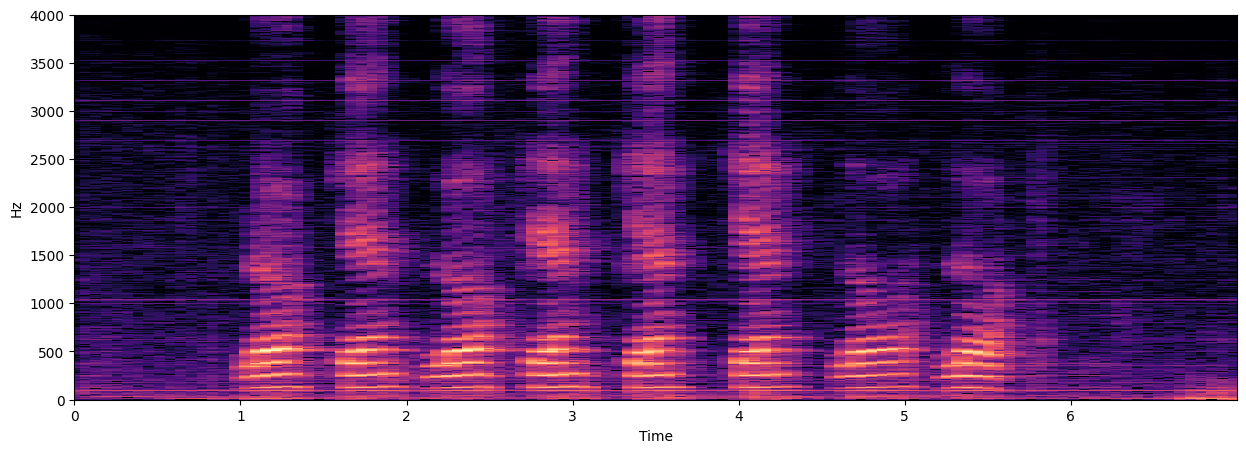

In [2]:
import librosa
import librosa.display
import numpy as np

# загрузим аудио-файл
audio_file_path = '../datasets/waves_yesno 2/0_1_0_1_1_1_0_0.wav'
x, sr = librosa.load(audio_file_path, sr=None)

# отображаем спектрограмму
D = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
plt.figure(figsize=(15, 5))
librosa.display.specshow(D, x_axis='time', y_axis='linear', sr=sr, cmap='magma')

# задаем метки на оси X
plt.xticks(list(range(0, int(len(x) / sr) + 1, 1)))

# установим диапазон значений на оси X
plt.xlim([0, 7])

plt.xlabel('Time')
plt.ylabel('Hz')
plt.show()

## Task 3

C помощью функции [load_dataset](code-samples/audio_utils.py) загрузи датасет. \
Раздели его на train и test c параметрами `test_size=0.2`, `random_state=42`. \
Выведи количество файлов в train и test частях.

In [3]:
import os
import glob
import librosa
from sklearn.model_selection import train_test_split

def load_dataset(directory: str):
    sr = None
    X, labels, files = [], [], []
    for f in glob.glob(directory + "/*.wav"):
        filename = os.path.basename(f)
        name = filename[:-4]
        y = [int(label) for label in name.split("_")]
        x, sr = librosa.load(f)
        X.append(x)
        labels.append(y)
        files.append(filename)

    return X, labels, sr, files

directory = "../datasets/waves_yesno 2/"
X, labels, sr, files = load_dataset(directory)

print("Количество файлов: ", len(X))

X_train, X_test, y_train, y_test = train_test_split(X,labels,test_size=0.2,random_state=42)

print("Количество файлов в train: ", len(X_train))
print("Количество файлов в test: ", len(X_test))

Количество файлов:  59
Количество файлов в train:  47
Количество файлов в test:  12


## Task 4

Наши аудио записи содержат как речь человека, так и молчание. Для каждой записи нам нужно определить сегменты записи, 
где человек молчит, а где произносит слова. \
Эта задача называется [Voice Activity Detection (VAD)](https://ru.wikipedia.org/wiki/Voice_Activity_Detection).
Придумайте или найдите метод, по которому можно распознавать участки с речью на аудио записи.

Например:
Запись '0_0_0_1_0_1_1_0.wav' содержит 137592 отсчетов. Сегменты с речью для этой записи (Отмечены красным):
[[23996, 32539],
 [35410, 44925],
 [49493, 57410],
 [60458, 68635],
 [73308, 81278],
 [84001, 91942],
 [97381, 104166],
 [109018, 115573]] 
![sftp](../misc/images/vad.png)

Выведи несколько примеров работы твоего VAD-алгоритма, по аналогии с примером, для других аудио записей. Попробуй добиться
наилучшего качества нахождения речи.

Аудио файл: ../datasets/waves_yesno 2/1_1_1_0_0_0_0_1.wav
Длина аудио файла: 133182 отсчетов
Длительность аудио файла: 6.04 секунд
Длительность фрейма: 25.0 мс
Количество фреймов: 242
Максимальное значение энергии: 7.519103278183225
Пороговое значение энергии: 0.07519103278183226
Количество сегментов с речью: 8


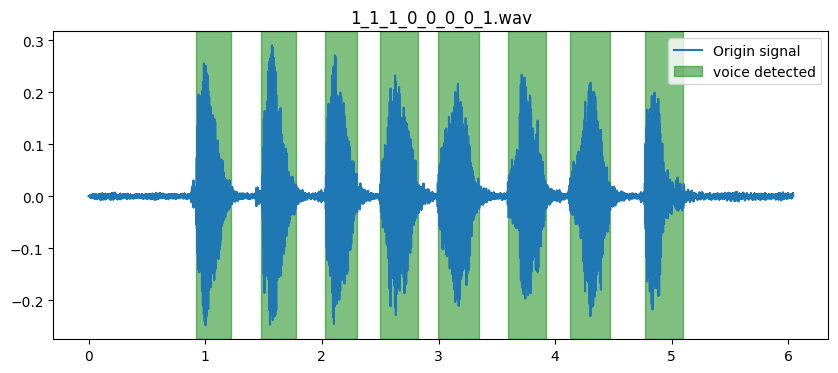

In [4]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

# читаем аудио файл
filepath = '../datasets/waves_yesno 2/1_1_1_0_0_0_0_1.wav'
data, sr = librosa.load(filepath)

# вычисляем энергию для каждого фрейма
framelength = 0.025 # длина фрейма, в секундах
framesamples = int(framelength * sr) # кол-во сэмплов в фрейме
energy = np.array([sum(abs(data[i:i+framesamples]**2)) for i in range(0, len(data), framesamples)])

# находим порог энергии, который должен быть превышен в речевых участках
energy_threshold = np.max(energy) * 0.01

# находим сегменты с речью, основанные на пороговом алгоритме
speech_segments = []
speech_segment_start = None
for i, e in enumerate(energy):
    if e > energy_threshold and speech_segment_start is None:
        speech_segment_start = i
    elif e <= energy_threshold and speech_segment_start is not None:
        if i - speech_segment_start >= 6:
            speech_segments.append((speech_segment_start, i))
        speech_segment_start = None

if speech_segment_start is not None:
    if len(data) - speech_segment_start >= 6:
        speech_segments.append((speech_segment_start, len(data)))

# выводим результаты
print(f'Аудио файл: {filepath}')
print(f'Длина аудио файла: {len(data)} отсчетов')
print(f'Длительность аудио файла: {len(data) / sr:.2f} секунд')
print(f'Длительность фрейма: {framelength*1000} мс')
print(f'Количество фреймов: {len(energy)}')
print(f'Максимальное значение энергии: {np.max(energy)}')
print(f'Пороговое значение энергии: {energy_threshold}')
print(f'Количество сегментов с речью: {len(speech_segments)}')

# выводим график сигнала с обводками в районах сегментов речи
fig, ax = plt.subplots(figsize=(10, 4))

# график аудио сигнала
x = np.arange(len(data)) / sr
ax.plot(x, data, label='Origin signal')
filename = os.path.basename(filepath)
ax.set_title(f'{filename}')

# добавим переменную для проверки, была ли уже добавлена надпись в легенду
legend_added=False

# отмечаем сегменты речи на графике
for i, segment in enumerate(speech_segments):
    start = segment[0] * framesamples / sr
    end = segment[1] * framesamples / sr   
    if not legend_added:
        ax.axvspan(start, end, alpha=0.5, color='green', label='voice detected')
        legend_added = True
    else:
        ax.axvspan(start, end, alpha=0.5, color='green')    
        
ax.legend()


Аудио файл: ../datasets/waves_yesno 2/0_0_1_0_1_0_0_0.wav
Длина аудио файла: 137151 отсчетов
Длительность аудио файла: 6.22 секунд
Длительность фрейма: 25.0 мс
Количество фреймов: 249
Максимальное значение энергии: 17.459386588007533
Пороговое значение энергии: 0.5237815976402259
Количество сегментов с речью: 8


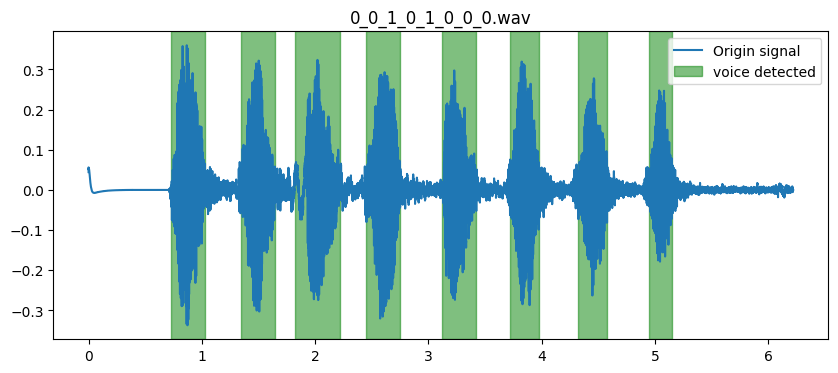

In [5]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

# читаем аудио файл
filepath = '../datasets/waves_yesno 2/0_0_1_0_1_0_0_0.wav'
data, sr = librosa.load(filepath)

# вычисляем энергию для каждого фрейма
framelength = 0.025 # длина фрейма, в секундах
framesamples = int(framelength * sr) # кол-во сэмплов в фрейме
energy = np.array([sum(abs(data[i:i+framesamples]**2)) for i in range(0, len(data), framesamples)])

# находим порог энергии, который должен быть превышен в речевых участках
energy_threshold = np.max(energy) * 0.03

# находим сегменты с речью, основанные на пороговом алгоритме
speech_segments = []
speech_segment_start = None
for i, e in enumerate(energy):
    if e > energy_threshold and speech_segment_start is None:
        speech_segment_start = i
    elif e <= energy_threshold and speech_segment_start is not None:
        if i - speech_segment_start >= 6:
            speech_segments.append((speech_segment_start, i))
        speech_segment_start = None

if speech_segment_start is not None:
    if len(data) - speech_segment_start >= 6:
        speech_segments.append((speech_segment_start, len(data)))

# выводим результаты
print(f'Аудио файл: {filepath}')
print(f'Длина аудио файла: {len(data)} отсчетов')
print(f'Длительность аудио файла: {len(data) / sr:.2f} секунд')
print(f'Длительность фрейма: {framelength*1000} мс')
print(f'Количество фреймов: {len(energy)}')
print(f'Максимальное значение энергии: {np.max(energy)}')
print(f'Пороговое значение энергии: {energy_threshold}')
print(f'Количество сегментов с речью: {len(speech_segments)}')

# выводим график сигнала с обводками в районах сегментов речи
fig, ax = plt.subplots(figsize=(10, 4))

# график аудио сигнала
x = np.arange(len(data)) / sr
ax.plot(x, data, label='Origin signal')
filename = os.path.basename(filepath)
ax.set_title(f'{filename}')

# добавим переменную для проверки, была ли уже добавлена надпись в легенду
legend_added=False

# отмечаем сегменты речи на графике
for i, segment in enumerate(speech_segments):
    start = segment[0] * framesamples / sr
    end = segment[1] * framesamples / sr   
    if not legend_added:
        ax.axvspan(start, end, alpha=0.5, color='green', label='voice detected')
        legend_added = True
    else:
        ax.axvspan(start, end, alpha=0.5, color='green')    
        
ax.legend()


In [6]:
#Этот код ничего не выводит, он сегментирует все файлы  в датасете и записывает результаты в текстовые файлы с тем же именем.
import librosa
import numpy as np
import os

# определяем директорию с аудио файлами
audio_dir = '../datasets/waves_yesno 2/'

for filename in os.listdir(audio_dir):
    # проверяем, что файл имеет формат WAV
    if filename.endswith('.wav'):
        # читаем аудио файл
        filepath = os.path.join(audio_dir, filename)
        data, sr = librosa.load(filepath)

        # вычисляем энергию для каждого фрейма
        framelength = 0.025 # длина фрейма, в секундах
        framesamples = int(framelength * sr) # кол-во сэмплов в фрейме
        energy = np.array([sum(abs(data[i:i+framesamples]**2)) for i in range(0, len(data), framesamples)])

        # находим порог энергии, который должен быть превышен в речевых участках
        energy_threshold = np.max(energy) * 0.01

        # находим сегменты с речью, основанные на пороговом алгоритме
        speech_segments = []
        speech_segment_start = None
        for i, e in enumerate(energy):
            if e > energy_threshold and speech_segment_start is None:
                speech_segment_start = i
            elif e <= energy_threshold and speech_segment_start is not None:
                if i - speech_segment_start >= 6:
                    speech_segments.append((speech_segment_start, i))
                speech_segment_start = None

        if speech_segment_start is not None:
            if len(data) - speech_segment_start >= 6:
                speech_segments.append((speech_segment_start, len(data)))

        # формируем имя выходного файла
        output_file = os.path.splitext(filename)[0] + '.txt'

        # записываем результат в текстовый файл
        with open(os.path.join(audio_dir, output_file), 'w') as f:
            for segment in speech_segments:
                start = segment[0] * framesamples / sr
                end = segment[1] * framesamples / sr   
                f.write(f'{start:.2f} {end:.2f}\n') 

## Task 5

После того как мы узнали сегменты аудио с речью, то можно перейти к самой задаче классификации. \
Внимательно изучи функцию [make_dataset](code-samples/audio_utils.py). С помощью этой функции cгенерируй X, Y для train и test выборок.
Затем попробуй обучить различные классификаторы. Например, SVM или LogisticRegression.
Измерь точность (accuracy) классификации на тестовой выборке.

In [7]:
def make_dataset(samples, labels, vad_segments):
    """

    :param samples: Список аудио сигналов
    :param labels: Список меток (Например для файла '0_0_0_1_0_1_1_0.wav': [0, 0, 0, 1, 0, 1, 1, 0])
    :param vad_segments: Список сегментов для каждого аудио сигнала вида:
        [
            [[23996, 32539], [35410, 44925], ...,],
            [[22141, 30259], [34917, 42695], ...,],
            ...
        ]
    :return:
    """
    X, y = [], []
    # Проходим по каждому аудио сигналу
    for sample in range(len(samples)):
        # В аудио сигнале проходим по каждому сегменту с речью
        for segment in range(len(vad_segments[sample]) - 1):
            start = vad_segments[sample][segment][0]  # Начало сегмента
            stop = vad_segments[sample][segment][1]  # Конец сегмента
            voice = samples[sample][start:stop]  # Отрезаем сегмент с речью из аудио сигнала и применяем stft
            stft = librosa.stft(voice).mean(axis=1)
            stft_db = librosa.amplitude_to_db(abs(stft))

            X.append(stft_db)  # Добавляем спектрограмму с речью
            y.append(labels[sample][segment])  # Добавляем метку для этой спектрограммы

    return np.array(X), np.array(y)

In [8]:
import os
import librosa
import numpy as np
import sys
sys.path.append('../code-samples/')
from audio_utils import make_dataset
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

samples = []
labels = []
data_dir = '../datasets/waves_yesno 2/'

for filename in os.listdir(data_dir):
    if filename.endswith('.wav'):
        sample, sr = librosa.load(os.path.join(data_dir, filename), sr=None)
        label = [int(x) for x in filename.split('.')[0].split('_')[1:]]
        samples.append(sample)
        labels.append(label)

vad_segments = []
for sample in samples:
    segments = librosa.effects.split(sample)
    vad_segments.append(segments)

# Создаем обучающий и тестовый датасеты
X_train, y_train = make_dataset(samples, labels, vad_segments)
X_test, y_test = make_dataset(samples, labels, vad_segments)

# Код применяет кратковременное преобразование Фурье (STFT) для извлечения признаков 
# из каждого сегмента и нормализует их перед обучением модели.
X_train_stft = [librosa.stft(voice).mean(axis=1) for voice in X_train]
X_train = [librosa.amplitude_to_db(abs(stft)) for stft in X_train_stft]

X_test_stft = [librosa.stft(voice).mean(axis=1) for voice in X_test]
X_test = [librosa.amplitude_to_db(abs(stft)) for stft in X_test_stft]

X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)
X_train_norm = (X_train - X_train_mean) / X_train_std
X_test_norm = (X_test - X_train_mean) / X_train_std

# Обучаем SVM модель
svm = SVC(kernel='linear')
svm.fit(X_train_norm, y_train)
y_pred = svm.predict(X_test_norm)
accuracy = accuracy_score(y_test, y_pred)
print('SVM accuracy:', accuracy)

# Обучаем модель логистической регрессии
logreg = LogisticRegression()
logreg.fit(X_train_norm, y_train)
y_pred = logreg.predict(X_test_norm)

#Считаем и выводим точность
accuracy = accuracy_score(y_test, y_pred)
print('Logistic regression accuracy:', accuracy)

SVM accuracy: 1.0
Logistic regression accuracy: 1.0


C:\Users\evpet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1025
  warnings.warn(
